# Inference for numerical data

To see the entire document please use this link:

https://colab.research.google.com/github/CorkCork/Computational_Math/blob/master/5-%20Inference_for_Numerical_Data.ipynb 

## North Carolina births

In 2004, the state of North Carolina released a large data set containing information on births recorded in this state. This data set is useful to researchers studying the relation between habits and practices of expectant mothers and the birth of their children. We will work with a random sample of observations from this data set.

## Exploratory analysis

Load the `nc` data set into our notebook.

In [1]:
# for Mac OS users only!
# if you run into any SSL certification issues, 
# you may need to run the following command for a Mac OS installation.
# $/Applications/Python 3.x/Install Certificates.command
# if this does not fix the issue, run this command instead.
import os, ssl
if (not os.environ.get('PYTHONHTTPSVERIFY', '') and
    getattr(ssl, '_create_unverified_context', None)): 
    ssl._create_default_https_context = ssl._create_unverified_context

import pandas as pd

nc = pd.read_csv('https://www.openintro.org/stat/data/nc.csv')

We have observations on 13 different variables, some categorical and some numerical. The meaning of each variable is as follows.

| variable         | description |
| ---------------- | ------------|
| `fage`           | father's age in years. |
| `mage`           | mother's age in years. |
| `mature`         | maturity status of mother. |
| `weeks`          | length of pregnancy in weeks. |
| `premie`         | whether the birth was classified as premature (premie) or full-term. |
| `visits`         | number of hospital visits during pregnancy. |
| `marital`        | whether mother is `married` or `not married` at birth. |
| `gained`         | weight gained by mother during pregnancy in pounds. |
| `weight`         | weight of the baby at birth in pounds. |
| `lowbirthweight` | whether baby was classified as low birthweight (`low`) or not (`not low`). |
| `gender`         | gender of the baby, `female` or `male`. |
| `habit`          | status of the mother as a `nonsmoker` or a `smoker`. |
| `whitemom`       | whether mom is `white` or `not white`. |

<div class = 'exercise'>
<h4>Exercise 1</h4>
What are the cases in this data set? How many cases are there in our sample?
</div>

In [2]:
nc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 13 columns):
fage              829 non-null float64
mage              1000 non-null int64
mature            1000 non-null object
weeks             998 non-null float64
premie            998 non-null object
visits            991 non-null float64
marital           999 non-null object
gained            973 non-null float64
weight            1000 non-null float64
lowbirthweight    1000 non-null object
gender            1000 non-null object
habit             999 non-null object
whitemom          998 non-null object
dtypes: float64(5), int64(1), object(7)
memory usage: 101.6+ KB


In [3]:
nc.head()

,fage,mage,mature,weeks,premie,visits,marital,gained,weight,lowbirthweight,gender,habit,whitemom
0,NaN,13,younger mom,39.0,full term,10.0,married,38.0,7.63,not low,male,nonsmoker,not white
1,NaN,14,younger mom,42.0,full term,15.0,married,20.0,7.88,not low,male,nonsmoker,not white
2,19.0,15,younger mom,37.0,full term,11.0,married,38.0,6.63,not low,female,nonsmoker,white
3,21.0,15,younger mom,41.0,full term,6.0,married,34.0,8.00,not low,male,nonsmoker,white
4,NaN,15,younger mom,39.0,full term,9.0,married,27.0,6.38,not low,female,nonsmoker,not white


There are 1000 cases which represent father and mother age, weight and gender of the baby, smoking habits and marital status of the parents.

As a first step in the analysis, we should consider summaries of the data. This can be done using the `describe()` and `info()`:

In [4]:
nc.describe()

,fage,mage,weeks,visits,gained,weight
count,829.000000,1000.000000,998.000000,991.000000,973.000000,1000.00000
mean,30.255730,27.000000,38.334669,12.104945,30.325797,7.10100
std,6.763766,6.213583,2.931553,3.954934,14.241297,1.50886
min,14.000000,13.000000,20.000000,0.000000,0.000000,1.00000
25%,25.000000,22.000000,37.000000,10.000000,20.000000,6.38000
50%,30.000000,27.000000,39.000000,12.000000,30.000000,7.31000
75%,35.000000,32.000000,40.000000,15.000000,38.000000,8.06000
max,55.000000,50.000000,45.000000,30.000000,85.000000,11.75000


In [5]:
nc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 13 columns):
fage              829 non-null float64
mage              1000 non-null int64
mature            1000 non-null object
weeks             998 non-null float64
premie            998 non-null object
visits            991 non-null float64
marital           999 non-null object
gained            973 non-null float64
weight            1000 non-null float64
lowbirthweight    1000 non-null object
gender            1000 non-null object
habit             999 non-null object
whitemom          998 non-null object
dtypes: float64(5), int64(1), object(7)
memory usage: 101.6+ KB


As you review the variable summaries, consider which variables are categorical and which are numerical. For numerical variables, are there outliers? If you aren't sure or want to take a closer look at the data, make a graph.

Consider the possible relationship between a mother's smoking habit and the weight of her baby. Plotting the data is a useful first step because it helps us quickly visualize trends, identify strong associations, and develop research questions.

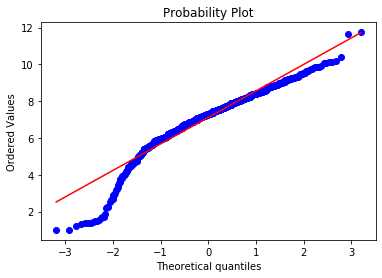

In [34]:
import scipy.stats as stats
from scipy.stats import probplot
import matplotlib.pyplot as plt


probplot(nc['weight'], plot = plt)
plt.show();

There are outliers.

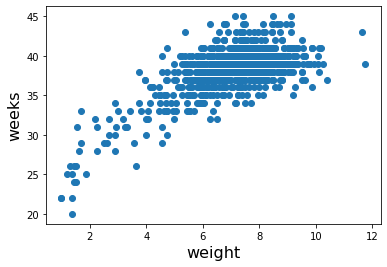

In [7]:
plt.scatter(nc.weight, nc.weeks)
plt.xlabel('weight', fontsize=16)
plt.ylabel('weeks', fontsize=16)
plt.show()

Positive correlation between weeks and weight.

<div class = 'exercise'>
<h4>Exercise 2</h4>
    Make a side-by-side boxplot of <code>habit</code> and <code>weight</code>. What does the plot highlight about the relationship between these two variables?
</div>

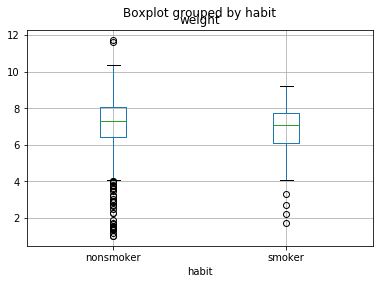

In [8]:
nc.boxplot(column = 'weight', by = 'habit')
plt.show();

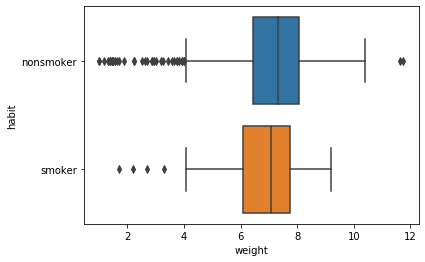

In [9]:
import seaborn as sns
sns.boxplot(x = nc['weight'], y = nc.habit)
plt.show()

The box plots show how the medians of the two distributions compare, but we can also compare the means of the distributions using the following function to split the `weight` variable into the `habit` groups, then take the mean of each using `mean()`.

In [10]:
nc.groupby(['habit'])['weight'].mean()

habit
nonsmoker    7.144273
smoker       6.828730
Name: weight, dtype: float64

There is an observed difference, but is this difference statistically significant? In order to answer this question we will conduct a hypothesis test .

## Inference

<div class = "exercise">
<h4>Exercise 3</h4>
Check if the conditions necessary for inference are satisfied. Note that you will need to obtain sample sizes to check the conditions. You can compute the group size using the same <code>groupby</code> command above but replacing <code>mean</code> with <code>size</code>.
</div>

In [11]:
nc.groupby(['habit'])['weight'].size()

habit
nonsmoker    873
smoker       126
Name: weight, dtype: int64

<div class = "exercise">
<h4>Exercise 4</h4>
Write the hypotheses for testing if the average weights of babies born to smoking and non-smoking mothers are different.
</div>

H0:  There is no difference in the mean weights of babies born to smoking and non-smoking mothers.
<div>
HA: There is a difference in the mean weights of babies born to smoking and non-smoking mothers.

We will now conduct hypothesis tests for testing if the average weights of babies born to smoking and non-smoking mothers are different. For this task, we can use [`statsmodels`](https://www.statsmodels.org/stable/index.html), a Python module that provides classes and functions for the estimation of many different statistical models, as well as for conducting statistical tests, and statistical data exploration.

In [12]:
import statsmodels.stats.weightstats as st

nc_weightANDsmoker = nc[nc['habit'] == 'smoker']['weight']
nc_weightANDnonsmoker = nc[nc['habit'] == 'nonsmoker']['weight']

dsw1 = st.DescrStatsW(nc_weightANDsmoker)
dsw2 = st.DescrStatsW(nc_weightANDnonsmoker)
cm = st.CompareMeans(dsw1, dsw2)

# calculate number of observations, mean and standard deviation for each group
n_smoker = dsw1.nobs
n_nonsmoker = dsw2.nobs
mean_smoker = dsw1.mean
mean_nonsmoker = dsw2.mean
sd_smoker = dsw1.std
sd_nonsmoker = dsw2.std
print(f'n_smoker = {n_smoker}')
print(f'mean_smoker = {mean_smoker}')
print(f'sd_smoker = {sd_smoker}')
print()
print(f'n_nonsmoker = {n_nonsmoker}')
print(f'mean_nonsmoker = {mean_nonsmoker}')
print(f'sd_nonsmoker = {sd_nonsmoker}')
print()

# conduct hypothesis test
ht = cm.ztest_ind(alternative = 'two-sided', usevar = 'unequal', value = 0)

# calculate and print the standard error, the Z-score, and p-value for the hypothesis test
se = cm.std_meandiff_separatevar
testZ = ht[0]
p_value = ht[1]
print(f'Standard error = {se}')
print(f'Test statistic: Z = {testZ}')
print(f'p-value = {p_value}')

# reject or accept null hypothesis
if(p_value) < 0.05:
    print('reject null hypothesis')
else:
    print('accept null hypothesis')

n_smoker = 126.0
mean_smoker = 6.828730158730159
sd_smoker = 1.380668106117173

n_nonsmoker = 873.0
mean_nonsmoker = 7.144272623138601
sd_nonsmoker = 1.5178105512705897

Standard error = 0.13376049190705977
Test statistic: Z = -2.3590109449334946
p-value = 0.018323715325166526
reject null hypothesis


<div class = 'exercise'>
<h4>Exercise 5</h4>
Construct a confidence interval for the difference between the weights of babies born to smoking and non-smoking mothers.</div>

In [13]:
# observed difference between the means
x = nc_weightANDsmoker.mean() - nc_weightANDnonsmoker.mean()
x

-0.3155424644084732

In [14]:
import numpy as np, statsmodels.stats.api as sms

cm = sms.CompareMeans(sms.DescrStatsW(nc_weightANDsmoker), sms.DescrStatsW(nc_weightANDnonsmoker))

In [15]:
# 95% CI
cm.tconfint_diff(usevar='unequal')

(-0.5795732754056026, -0.05151165341128172)

---
## On Your Own

<ol>
    <li>Calculate a 95% confidence interval for the average length of pregnancies (<code>weeks</code>) and interpret it in context. Note that since you're doing inference on a single population parameter, there is no explanatory variable, so you can omit the <code>x</code> variable from the function.</li><br>
    <li>Calculate a new confidence interval for the same parameter at the 90% confidence level.</li><br>
    <li>Conduct a hypothesis test evaluating whether the average weight gained by younger mothers is different than the average weight gained by mature mothers.</li><br>
    <li>Now, a non-inference task: Determine the age cutoff for younger and mature mothers. Use a method of your choice, and explain how your method works.</li><br>
    <li>Pick a pair of numerical and categorical variables and come up with a research question evaluating the relationship between these variables. Formulate the question in a way that it can be answered using a hypothesis test and/or a confidence interval. Answer your question with Python, report the statistical results, and also provide an explanation in plain language.</li>
</ol>

<div class = "license">
This lab was adapted by Vural Aksakalli and Imran Ture from OpenIntro by Andrew Bray and Mine Çetinkaya-Rundel.
</div>

***
www.featureranking.com

1- Calculate a 95% confidence interval for the average length of pregnancies (<code>weeks</code>) and interpret it in context. Note that since you're doing inference on a single population parameter, there is no explanatory variable, so you can omit the <code>x</code> variable from the function.

In [16]:
x_bar = nc.weeks.mean()
x_bar

38.33466933867736

In [17]:
sigma = nc.weeks.std()
sigma

2.931552907287613

In [18]:
z_critical = stats.norm.ppf(q=0.975)
z_critical

1.959963984540054

In [19]:
zinterval = stats.norm.interval(alpha=.05)
zinterval

(-0.06270677794321385, 0.06270677794321385)

In [20]:
import math
n = len(nc.weight)
standard_error = sigma / math.sqrt(n)
standard_error

0.09270384268317283

In [21]:
CI_lower = x_bar - z_critical * standard_error
CI_upper = x_bar + z_critical * standard_error

CI_lower, CI_upper

(38.15297314578987, 38.516365531564844)

2- Calculate a new confidence interval for the same parameter at the 90% confidence level.

In [22]:
z_critical2 = stats.norm.ppf(q=0.941)
z_critical2

1.5632236468662757

In [23]:
CI_lower2 = x_bar - z_critical2 * standard_error
CI_upper2 = x_bar + z_critical2 * standard_error

CI_lower2, CI_upper2

(38.18975249963965, 38.47958617771506)

3- Conduct a hypothesis test evaluating whether the average weight gained by younger mothers is different than the average weight gained by mature mothers.

In [24]:
nc['mature'].value_counts()

younger mom    867
mature mom     133
Name: mature, dtype: int64

In [25]:
nc.gained.isnull().mean().round(2) * 100

3.0

In [26]:
nc.dropna(subset = ['gained'], how='all', inplace=True)

In [27]:
nc_youngweight = nc[nc['mature'] == 'younger mom']['gained']
nc_matureweight = nc[nc['mature'] == 'mature mom']['gained']

yg = st.DescrStatsW(nc_youngweight)
mt = st.DescrStatsW(nc_matureweight)
cms = st.CompareMeans(yg, mt)

n_young = yg.nobs
n_mature = mt.nobs
mean_young = yg.mean
mean_mature = mt.mean
sd_young = yg.std
sd_mature = mt.std
print(f'n_young = {n_young}')
print(f'mean_young = {mean_young}')
print(f'sd_young = {sd_young}')
print()
print(f'n_mature = {n_mature}')
print(f'mean_mature = {mean_mature}')
print(f'sd_mature = {sd_mature}')
print()

ht = cms.ztest_ind(alternative = 'two-sided', usevar = 'unequal', value = 0)

se = cms.std_meandiff_separatevar
testZ = ht[0]
p_value = ht[1]
print(f'Standard error = {se}')
print(f'Test statistic: Z = {testZ}')
print(f'p-value = {p_value}')

if(p_value) < 0.05:
    print('reject null hypothesis')
else:
    print('accept null hypothesis')

n_young = 844.0
mean_young = 30.56042654028436
sd_young = 14.33840822856442

n_mature = 129.0
mean_mature = 28.790697674418606
sd_mature = 13.430079867583979

Standard error = 1.2856891093446254
Test statistic: Z = 1.376482738325338
p-value = 0.16867222789392544
accept null hypothesis


4- Now, a non-inference task: Determine the age cutoff for younger and mature mothers. Use a method of your choice, and explain how your method works.

In [28]:
nc_young = nc[nc['mature'] == 'younger mom']
nc_mature = nc[nc['mature'] == 'mature mom']

min(nc_mature.mage)

35

In [29]:
max(nc_young.mage)

34

Mature cutoff age is 35, young cutoff is 34. In this method I first see the mature mom minimum age and then young mom maximum age.

5- Pick a pair of numerical and categorical variables and come up with a research question evaluating the relationship between these variables. Formulate the question in a way that it can be answered using a hypothesis test and/or a confidence interval. Answer your question with Python, report the statistical results, and also provide an explanation in plain language.

I will conduct a hypothesis test evaluating whether the length of pregnancy is different based on age.

H0: There is no difference in the pregnancy lengths of mature and young mothers.
<div>
HA: There is difference in the pregnancy lengths of mature and young mothers.

I will first check whether there are null values in the <code>weeks</code> column and if so, will drop them.

In [30]:
nc.weeks.isnull().mean()

0.0010277492291880781

In [31]:
nc.dropna(subset = ['weeks'], how='all', inplace=True)

In [33]:
nc_youngweeks = nc[nc['mature'] == 'younger mom']['weeks']
nc_matureweeks = nc[nc['mature'] == 'mature mom']['weeks']

ygw = st.DescrStatsW(nc_youngweeks)
mtw = st.DescrStatsW(nc_matureweeks)
cmym = st.CompareMeans(ygw, mtw)

n_young = ygw.nobs
n_mature = mtw.nobs
mean_young = ygw.mean
mean_mature = mtw.mean
sd_young = ygw.std
sd_mature = mtw.std
print(f'n_young = {n_young}')
print(f'mean_young = {mean_young}')
print(f'sd_young = {sd_young}')
print()
print(f'n_mature = {n_mature}')
print(f'mean_mature = {mean_mature}')
print(f'sd_mature = {sd_mature}')
print()

ht = cmym.ztest_ind(alternative = 'two-sided', usevar = 'unequal', value = 0)

se = cmym.std_meandiff_separatevar
testZ = ht[0]
p_value = ht[1]
print(f'Standard error = {se}')
print(f'Test statistic: Z = {testZ}')
print(f'p-value = {p_value}')

if(p_value) < 0.05:
    print('reject null hypothesis')
else:
    print('accept null hypothesis')

n_young = 843.0
mean_young = 38.42111506524318
sd_young = 2.8396247542179065

n_mature = 129.0
mean_mature = 38.03875968992248
sd_mature = 3.2311543063669044

Standard error = 0.3018971087377245
Test statistic: Z = 1.266508900729068
p-value = 0.20533094483491388
accept null hypothesis


We fail to reject the null hypothesis which means that there is no difference between the means of younger and mature mothers' pregnancy lengths. 

## Thank you for reading!